# Question 3: Clustering
**1.1 K-means clustering**

**<font color='teal'>a)</font>** Perform K-means clustering on the formulae from the heat capacity problem (HW2, Question 2). See if you can see trends in clusters when you change the numbers of clusters (turning on data point labels with formula will help)

In [1]:
#your code goes here
from sklearn.cluster import KMeans
import pandas as pd
from CBFV import composition
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# Featurize the data 
filename = 'C:\cp_data_demo.csv'
df=pd.read_csv(filename)
rename_dict = {'CONDITION: Temperature (K)':'Temperature', 'PROPERTY: Heat Capacity (J/mol K)':'target', 'FORMULA':'formula'}
df = df.rename(columns=rename_dict)
df = df.dropna()
df = df.reset_index(drop=True)
nunique=df.nunique()


X_feats, y_feats, formulae_train, skipped_train = composition.generate_features(df, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
#X_test_feats_unscaled, y_test, formulae_train, skipped_train = composition.generate_features(test_df, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_feats)

# Normalize the data
#X_train = normalize(X_train)


Processing Input Data: 100%|██████████| 4570/4570 [00:00<00:00, 15947.17it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4570/4570 [00:00<00:00, 7838.89it/s]


	Creating Pandas Objects...


In [2]:
#X_feats = pd.DataFrame(X_feats)
#print(X_feats)
#y_feats = pd.DataFrame(y_feats)
#print(y_feats)
##new_df = X_feats.join(y_feats)
#print(new_df)
newdf = pd.DataFrame(X_feats)
kmeans = KMeans(n_clusters=nunique['formula'], random_state=0, n_init="auto").fit(newdf)
newdf['k_means_244'] = kmeans.labels_
kmeans = KMeans(n_clusters=100, random_state=0, n_init="auto").fit(newdf)
newdf['k_means_100'] = kmeans.labels_
kmeans = KMeans(n_clusters=50, random_state=0, n_init="auto").fit(newdf)
newdf['k_means_50'] = kmeans.labels_
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(newdf)
newdf['k_means_10'] = kmeans.labels_
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(newdf)
newdf['k_means_3'] = kmeans.labels_


C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_18380\314567831.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newdf['k_means_244'] = kmeans.labels_
C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_18380\314567831.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newdf['k_means_100'] = kmeans.labels_
C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_18380\314567831.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [3]:
print(newdf)

      sum_Atomic_Number  sum_Atomic_Weight  sum_Period  sum_group  \
0                  34.0            69.6202        10.0       74.0   
1                  34.0            69.6202        10.0       74.0   
2                  34.0            69.6202        10.0       74.0   
3                  34.0            69.6202        10.0       74.0   
4                  34.0            69.6202        10.0       74.0   
...                 ...                ...         ...        ...   
4565               40.0            91.2240         5.0        4.0   
4566               40.0            91.2240         5.0        4.0   
4567               40.0            91.2240         5.0        4.0   
4568               40.0            91.2240         5.0        4.0   
4569               40.0            91.2240         5.0        4.0   

      sum_families  sum_Metal  sum_Nonmetal  sum_Metalliod  \
0             33.0        0.0           3.0            2.0   
1             33.0        0.0           3.0    

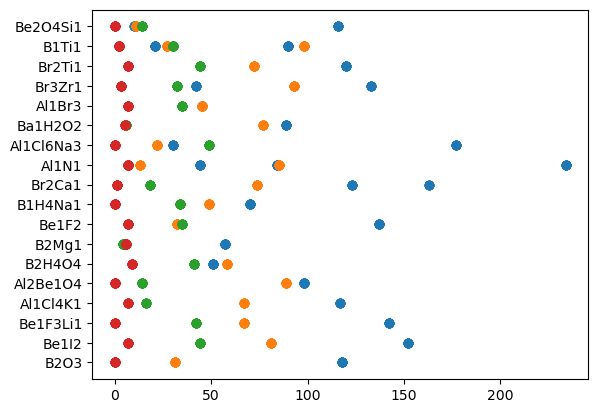

In [4]:
plt.scatter(x=newdf['k_means_244'][1:300],y=df['formula'][1:300])
plt.scatter(x=newdf['k_means_100'][1:300],y=df['formula'][1:300])
plt.scatter(x=newdf['k_means_50'][1:300],y=df['formula'][1:300])
plt.scatter(x=newdf['k_means_10'][1:300],y=df['formula'][1:300])

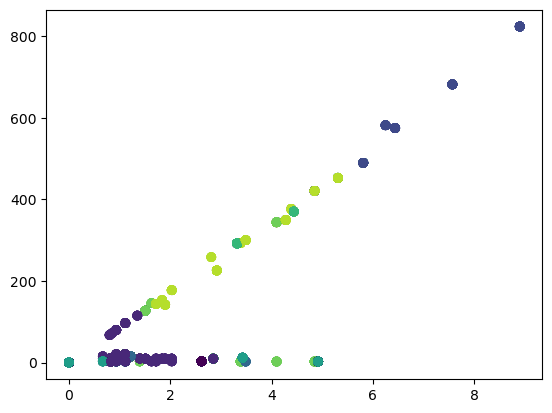

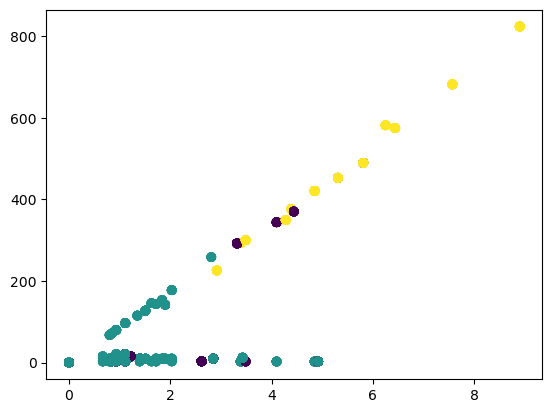

In [5]:
plt.scatter(x=newdf['mode_Cohesive_energy'],y=newdf['mode_heat_of_vaporization_(kJ/mol)_'],c=newdf['k_means_10'])
plt.show()
plt.scatter(x=newdf['mode_Cohesive_energy'],y=newdf['mode_heat_of_vaporization_(kJ/mol)_'],c=newdf['k_means_3'])
plt.show()

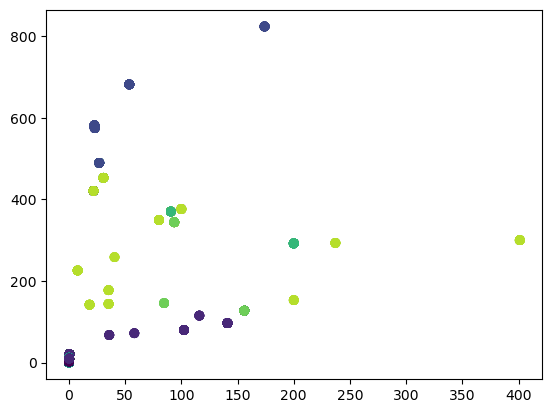

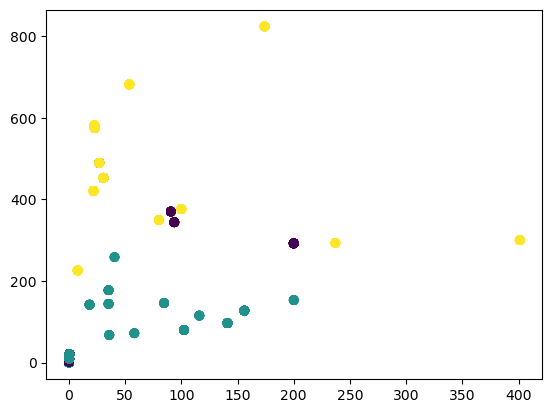

In [6]:
plt.scatter(x=newdf['mode_thermal_conductivity_(W/(m_K))_'],y=newdf['mode_heat_of_vaporization_(kJ/mol)_'],c=newdf['k_means_10'])
plt.show()
plt.scatter(x=newdf['mode_thermal_conductivity_(W/(m_K))_'],y=newdf['mode_heat_of_vaporization_(kJ/mol)_'],c=newdf['k_means_3'])
plt.show()

**1.2 t-sne clustering vs umap**

**<font color='teal'>b)</font>** Now compare t-sne and umap embeddings. Explore the parameters a bit. 

In [7]:
#your code goes here

# T-SNE
from sklearn.manifold import TSNE

# Play with perplexity settings

tsne_data_10 = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=10).fit_transform(newdf)

tsne_data_50 = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=50).fit_transform(newdf)

tsne_data_100 = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=100).fit_transform(newdf)

In [8]:
print(newdf)

      sum_Atomic_Number  sum_Atomic_Weight  sum_Period  sum_group  \
0                  34.0            69.6202        10.0       74.0   
1                  34.0            69.6202        10.0       74.0   
2                  34.0            69.6202        10.0       74.0   
3                  34.0            69.6202        10.0       74.0   
4                  34.0            69.6202        10.0       74.0   
...                 ...                ...         ...        ...   
4565               40.0            91.2240         5.0        4.0   
4566               40.0            91.2240         5.0        4.0   
4567               40.0            91.2240         5.0        4.0   
4568               40.0            91.2240         5.0        4.0   
4569               40.0            91.2240         5.0        4.0   

      sum_families  sum_Metal  sum_Nonmetal  sum_Metalliod  \
0             33.0        0.0           3.0            2.0   
1             33.0        0.0           3.0    

In [9]:
import numpy as np

label = newdf['mode_thermal_conductivity_(W/(m_K))_']
plot_data_10 = np.vstack((tsne_data_10.T,label)).T
tsne_df_10 = pd.DataFrame(data=plot_data_10,columns=("Dim1","Dim2","label"))

label = newdf['mode_thermal_conductivity_(W/(m_K))_']
plot_data_50 = np.vstack((tsne_data_50.T,label)).T
tsne_df_50 = pd.DataFrame(data=plot_data_50,columns=("Dim1","Dim2","label"))

label = newdf['mode_thermal_conductivity_(W/(m_K))_']
plot_data_100 = np.vstack((tsne_data_100.T,label)).T
tsne_df_100 = pd.DataFrame(data=plot_data_100,columns=("Dim1","Dim2","label"))

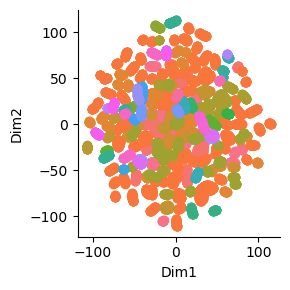

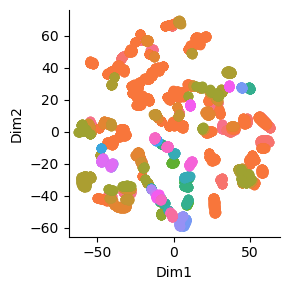

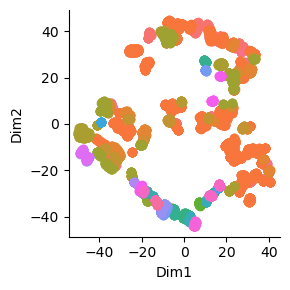

In [10]:
import seaborn as sn

sn.FacetGrid(tsne_df_10,hue="label").map(plt.scatter,"Dim1","Dim2")
plt.show()

sn.FacetGrid(tsne_df_50,hue="label").map(plt.scatter,"Dim1","Dim2")
plt.show()

sn.FacetGrid(tsne_df_100,hue="label").map(plt.scatter,"Dim1","Dim2")
plt.show()

It looks like the higher the perplexity value the more segmented and grouped the data becomes.

In [11]:
# UMAP
from umap import UMAP
import umap.plot
import plotly.express as px

features = newdf
umap_2d = UMAP(n_components=2,init='random',random_state=0) # 2D Umap
proj_2d = umap_2d.fit_transform(newdf)


c:\Miniconda3\envs\MatInformatics\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
label = newdf['mode_thermal_conductivity_(W/(m_K))_']
fig_2d = px.scatter(proj_2d,x=0,y=1,color=newdf['mode_thermal_conductivity_(W/(m_K))_'],labels={'color':'species'})
fig_2d.show()

In [17]:

fulldata=newdf
data=newdf['mode_thermal_conductivity_(W/(m_K))_']

# draw_umap function from Umap documentation
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(fulldata);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manif

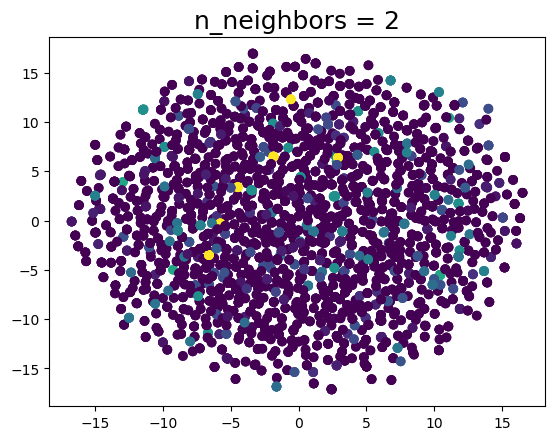

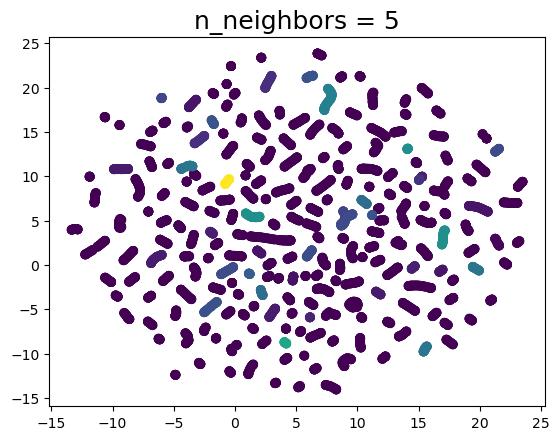

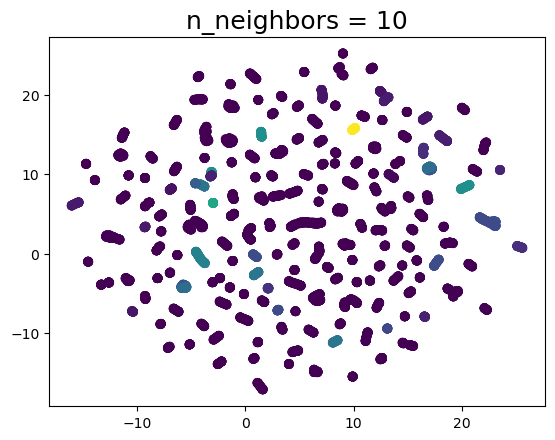

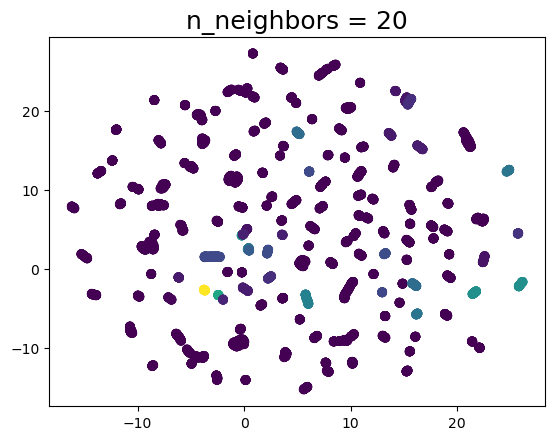

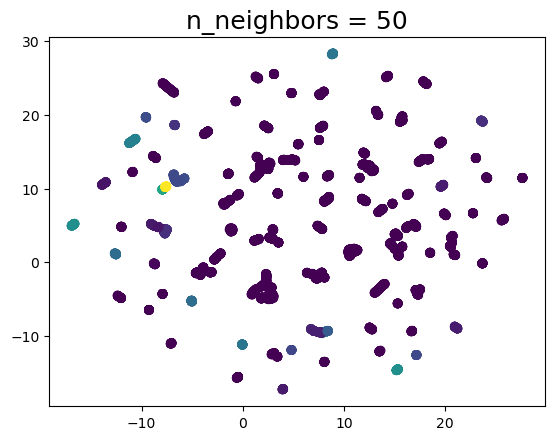

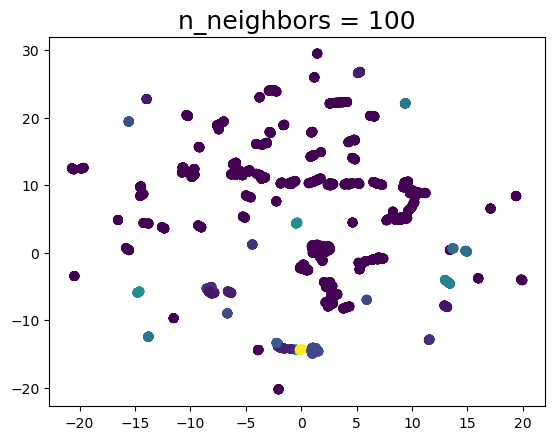

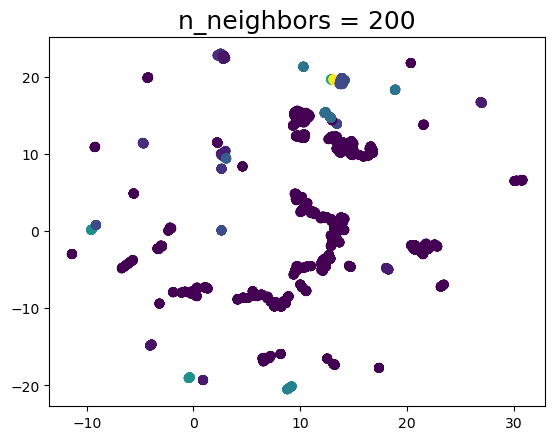

In [18]:
# explore how number of nearest neighbors affacts Umap

for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

c:\Miniconda3\envs\MatInformatics\lib\site-packages\sklearn\manif

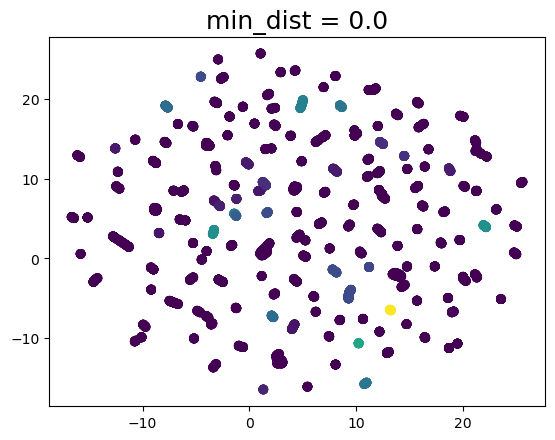

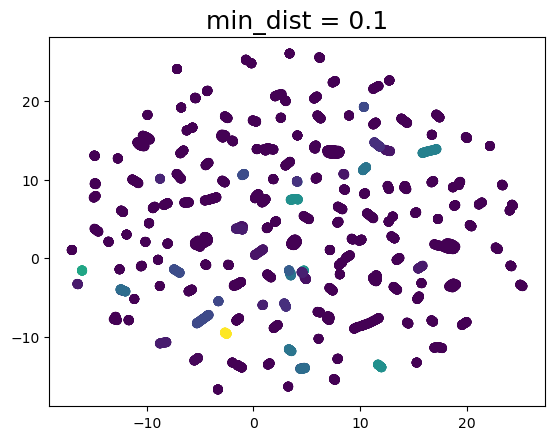

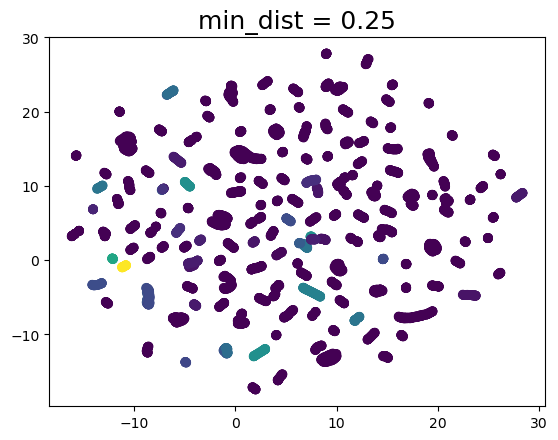

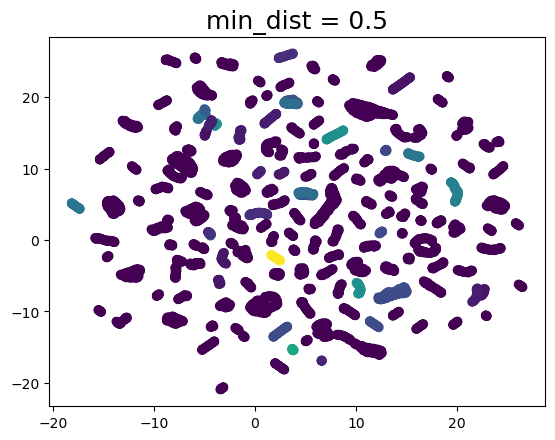

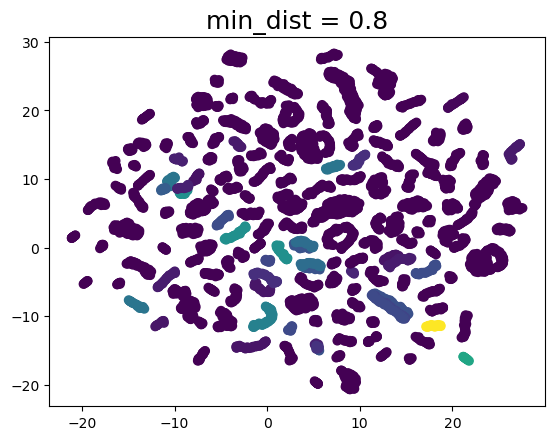

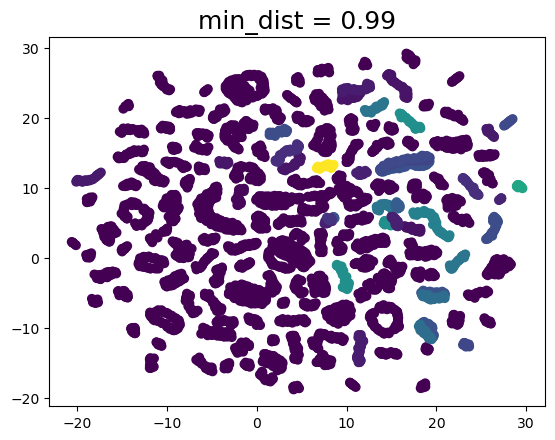

In [19]:
# explore how min dist affects Umap distribution

for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))